In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import lane_detection
import lane_following

In [2]:
test_line = lane_detection.Line(1, 1, 2, 2)
test_line.x_intercept

1080.0

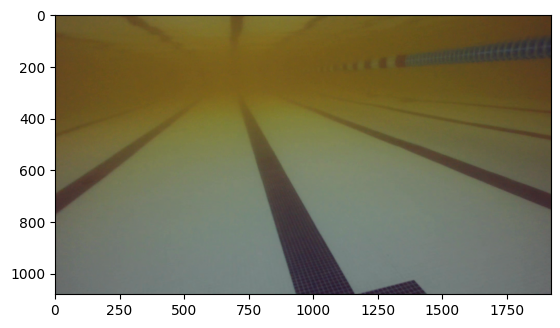

In [3]:
# img = cv2.imread("lanes.png")
img = cv2.imread("rov_pool.jpg")
width = img.shape[1]
plt.imshow(img)

In [4]:
lines = lane_detection.detect_lines(img, 50, 50, 3, 300, 30)


In [5]:
# fixed_lines = lane_detection.merge_colinear_lines(lines)
(slopes, intercept_points) = lane_detection.get_slopes_intercepts(lines)
x_intercepts = [point[0] for point in intercept_points]

x_intercepts

[1160.0,
 2983.0,
 1157.0,
 932.0,
 2721.0,
 2724.0,
 932.0,
 2982.0,
 2727.0,
 931.0,
 2729.0]

In [6]:
# filtered_lines = lane_detection.merge_colinear_lines(lines)
filtered_lines = lines
lanes = lane_detection.detect_lanes(filtered_lines, width)

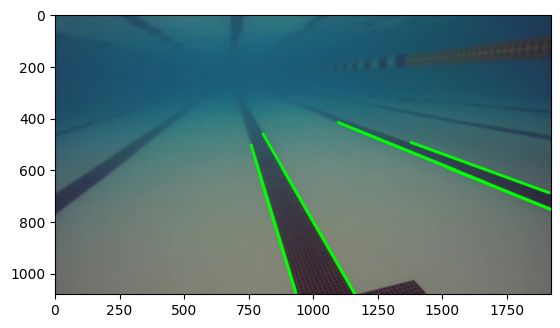

In [7]:
# lined_img = lane_detection.draw_lines(img, lines)
laned_img = lane_detection.draw_lanes(img, lanes)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [8]:
(center_slope, center_intercept) = lane_following.get_lane_center(lanes)
direction = lane_following.recommend_direction(center_intercept, center_slope, width)
print(f"The AUV should go to the {direction}")

Center x_intercept: x_intercept = 1158.5
The AUV should go to the forward


Center x_intercept: x_intercept = 2050.0
The AUV should go to the right


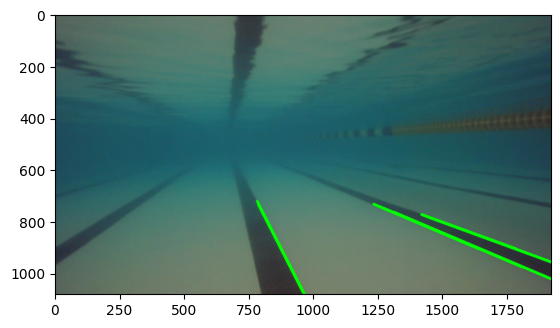

Center x_intercept: x_intercept = 1055.0
The AUV should go to the forward


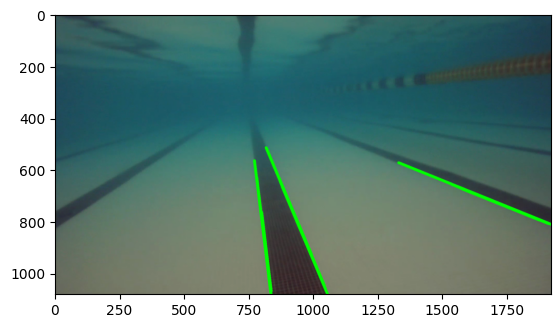

Center x_intercept: x_intercept = 845.0
The AUV should go to the forward


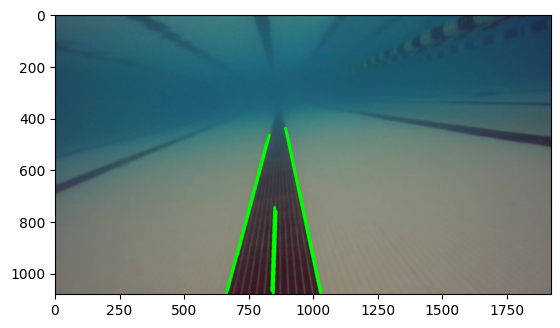

Center x_intercept: x_intercept = 6235.5
The AUV should go to the right


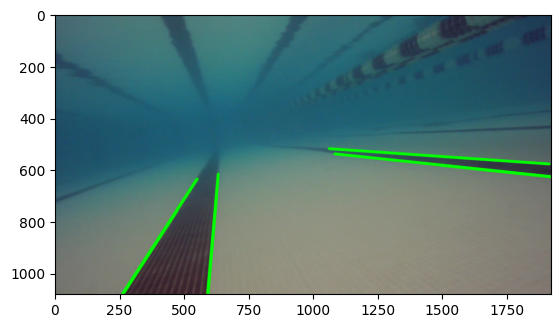

Center x_intercept: x_intercept = 797.5
The AUV should go to the forward


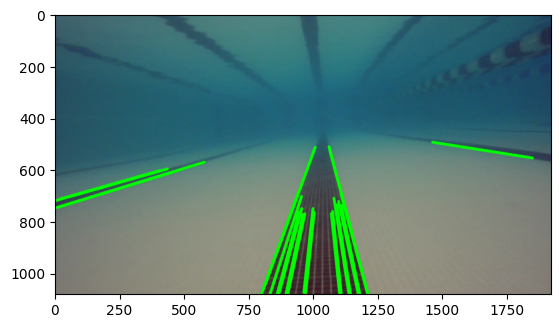

Center x_intercept: x_intercept = 950.0
The AUV should go to the forward


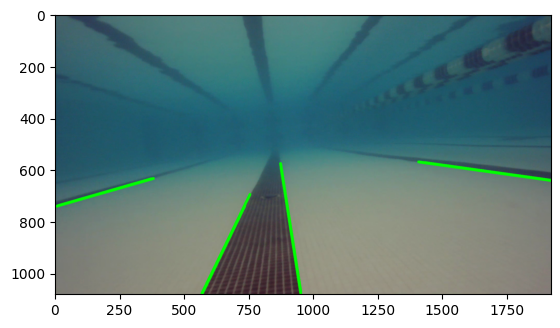

Center x_intercept: x_intercept = -13.0
The AUV should go to the left


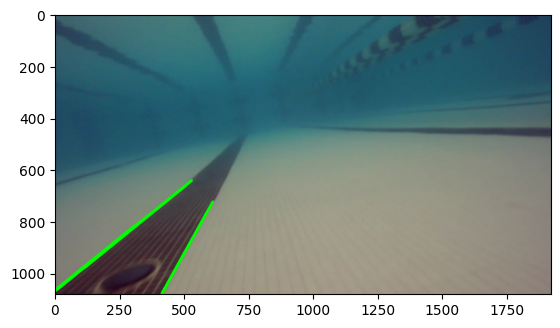

Center x_intercept: x_intercept = 2273.0
The AUV should go to the right


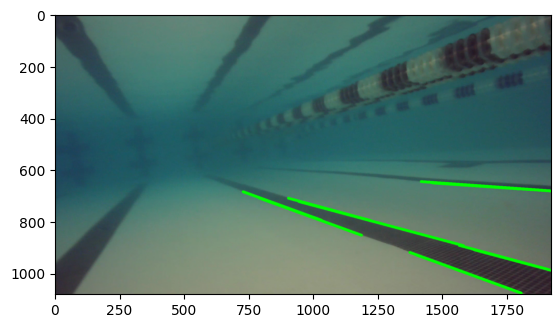

Center x_intercept: x_intercept = 8494.5
The AUV should go to the right


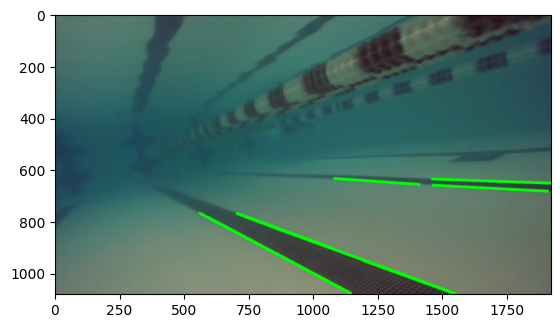

Center x_intercept: x_intercept = 3390.0
The AUV should go to the right


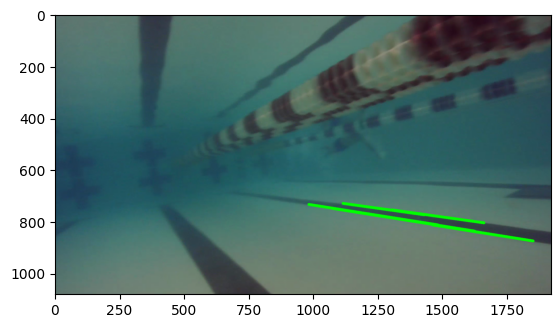

Center x_intercept: x_intercept = 979.5
The AUV should go to the forward


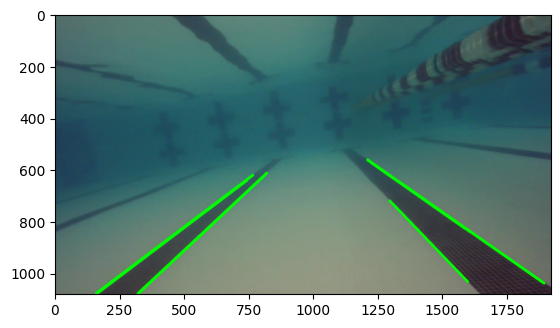

Center x_intercept: x_intercept = 1122.5
The AUV should go to the forward


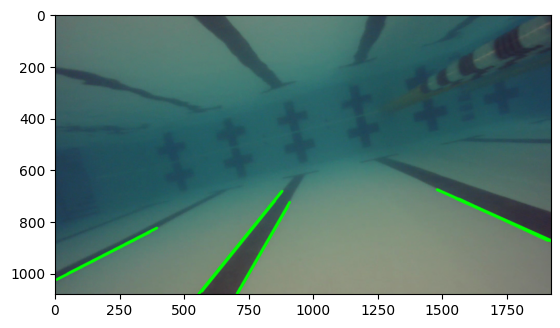

Center x_intercept: x_intercept = -1619.0
The AUV should go to the left


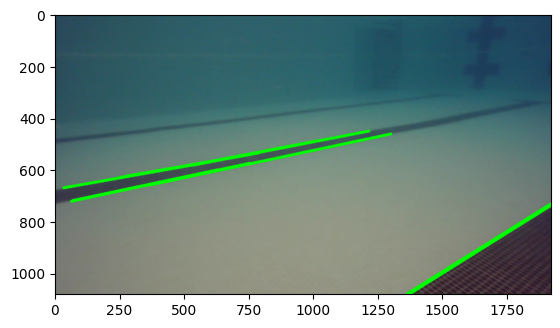

Center x_intercept: x_intercept = 2514.0
The AUV should go to the right


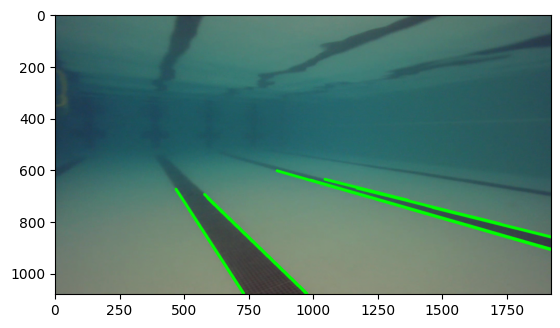

Center x_intercept: x_intercept = 4256.5
The AUV should go to the right


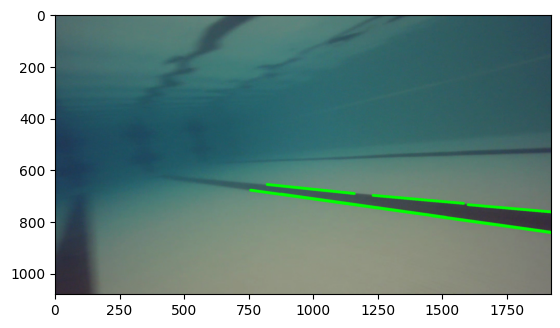

Center x_intercept: x_intercept = 4149.0
The AUV should go to the right


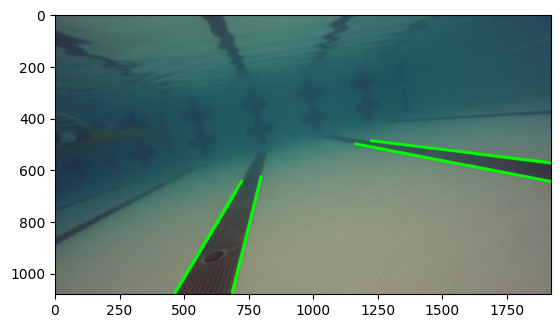

Center x_intercept: x_intercept = 5164.5
The AUV should go to the right


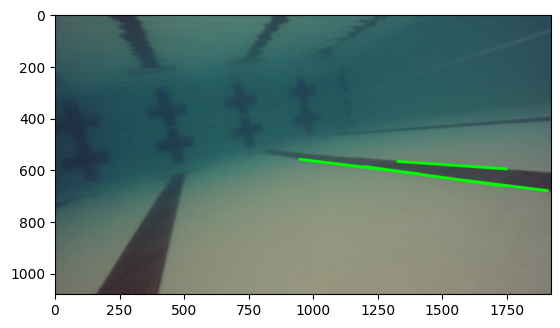

Center x_intercept: x_intercept = 3152.0
The AUV should go to the right


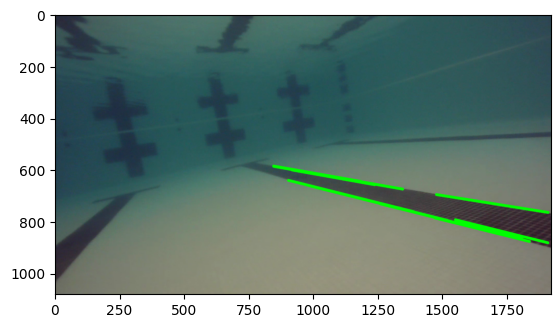

Center x_intercept: x_intercept = -6252.0
The AUV should go to the left


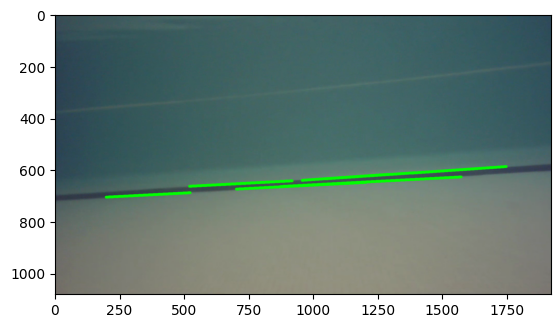

Center x_intercept: x_intercept = -1107.0
The AUV should go to the left


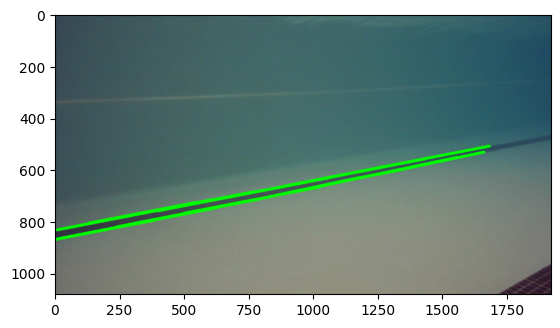

Center x_intercept: x_intercept = -528.5
The AUV should go to the left


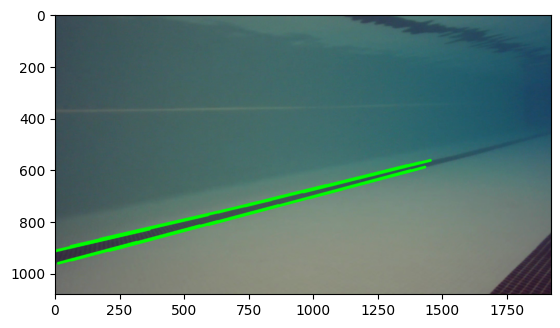

Center x_intercept: x_intercept = 1017.5
The AUV should go to the forward


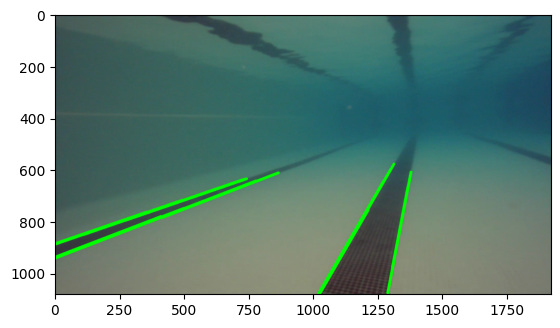

KeyboardInterrupt: 

In [10]:
cap = cv2.VideoCapture('AUV_Vid.mkv')

# plt.imshow(detect_lanes(cv2.imread("rov_pool.jpg"), 50, 50))
# ret, frame = cap.read()
# plt.imshow(detect_lanes(frame, 50, 50))

count = 0
frequency = 60
while cap.isOpened():
    ret, frame = cap.read()
    if count % frequency == 0:
        width = frame.shape[1]
        lines = lane_detection.detect_lines(frame, 50, 50, 3, 300, 30)
        lanes = lane_detection.detect_lanes(lines, width)
        laned_img = lane_detection.draw_lanes(frame, lanes)
        (center_slope, center_intercept) = lane_following.get_lane_center(lanes)
        direction = lane_following.recommend_direction(center_intercept, center_slope, width)
        print(f"The AUV should go to the {direction}")

        plt.imshow(cv2.cvtColor(laned_img, cv2.COLOR_BGR2RGB))
        plt.show()
        

    count += 1